<a href="https://colab.research.google.com/github/BelenUrdangarin/Entregables---Urdangarin/blob/main/Notebook_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

En esta notebook, vamos a demostrar como funcionan los algoritmos vistos en clase y su implementación en Scikit-learn.

# Regresión Lineal

Vamos a empezar generando unos datos para mostrar unos ejemplos

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

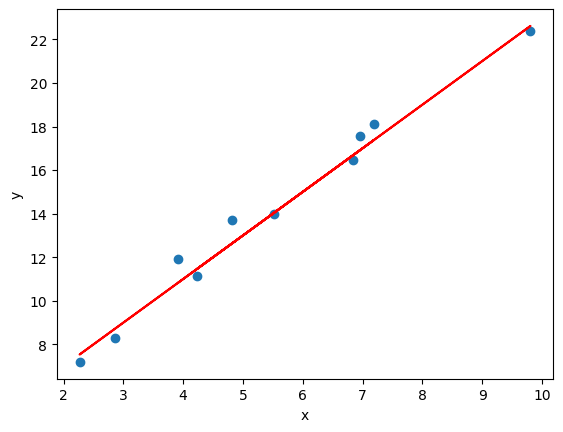

In [2]:
# Creamos datos que sigan una recta
np.random.seed(123) #Fija una semilla para la generación de números aleatorios
a = 2 #Define los coeficientes de la recta
b = 3
x = np.random.rand(10)*10 #Genera 10 valores aleatorios entre 0 y 10
y = a*x+b + np.random.randn(10)*0.5 #Calcula los valores de y con el agregado de ruido aleatorio
plt.scatter(x,y) #Grafica los puntos con un diagrama de dispersión
plt.plot(x, a*x+b, 'r')
plt.xlabel('x');
plt.ylabel('y');

#Es un grafico que muestra como los puntos se distribuyen alrededor de la linea roja

In [3]:
x

array([6.96469186, 2.86139335, 2.26851454, 5.51314769, 7.1946897 ,
       4.2310646 , 9.80764198, 6.84829739, 4.80931901, 3.92117518])

In [4]:
x.reshape(-1,1) #El método .reshape(-1,1) en NumPy convierte x en una matriz bidimensional con una sola columna.

array([[6.96469186],
       [2.86139335],
       [2.26851454],
       [5.51314769],
       [7.1946897 ],
       [4.2310646 ],
       [9.80764198],
       [6.84829739],
       [4.80931901],
       [3.92117518]])

La búsqueda de un modelo que describa el comportamiento de nuestros datos parte del supuesto de que existe una relación o función matemática subyacente que los relaciona. Nuestro trabajo es encontrar esa función.
Para eso vamos a usar la librería Scikit-Learn

In [5]:
#Buscamos un modelo que describa el comportamiento de los datos mediante una relación matemática
from sklearn.linear_model import LinearRegression

In [6]:
# Instanciamos el modelo
lr = LinearRegression()

#Se emplea cuando la variable objetivo (y) es numérica y continua (ej. temperatura, ingresos, consumo eléctrico).
#Busca ajustar una línea que minimice el error en la predicción de y según x.

In [7]:
# Le pedimos que encuentre los parámetros que mejor se ajustan a nuestros datos
#aca se entrena un modelo de regresión lineal (lr) con los datos (x, y),
#permitiéndole encontrar los coeficientes óptimos de la recta que mejor ajusta estos puntos. Al ejecutar lr.fit(x.reshape(-1,1), y), el modelo determinará:
#Pendiente (coef_): Qué tan inclinado es el ajuste con respecto a x.
#Intercepto (intercept_): El punto donde la recta cruza el eje y.

lr.fit(x.reshape(-1,1), y) #Le damos nuestros datos y le pedimos parametros que lo ajusten

LinearRegression()

Veamos qué encontró

In [8]:
# Imprimimos la pendiente
lr.coef_

array([2.02565598])

In [9]:
# Imprimimos la ordenada al origen
lr.intercept_

np.float64(3.0600038699795835)

In [10]:
print(f"R²: {lr.score(x.reshape(-1,1), y)}")
#Si quieres evaluar qué tan bien el modelo se ajusta a los datos, podrías calcular el coeficiente de determinación
#Dio 0.98 lo que es una muy buena aproximación

R²: 0.9825855350638332


Esto significa que la recta encontrada es $$y = 2.02565598 · x + 3.0600038699795835$$

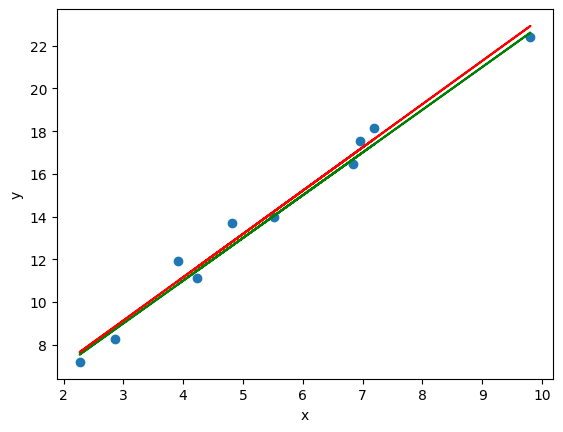

In [11]:
np.random.seed(123)
# y real
a = 2
b = 3
x = np.random.rand(10)*10
y = a*x + b + np.random.randn(10)*0.5
y_real = a*x + b
# y predicha
a_p = lr.coef_
b_p = lr.intercept_
y_predicted = a_p * x + b_p
plt.scatter(x, y)
plt.plot(x, y_real, 'green')
plt.plot(x, y_predicted, 'r')
plt.xlabel('x');
plt.ylabel('y');

#Se comparan las dos rectas, con una pequeña variacion con respecto a la anterior

# Regresión Logística

Vamos a entrenar un modelo para poder clasificar una observación en una categoría según sus características.



Armemos un dataset de juguete

In [13]:
from sklearn.datasets import make_classification
# Crea un dataset random y multiclase. se pueden controlar varios aspectos
# de la generación del dataset, como el numero de muestras, el numero de campos y el numero de clases.
# Permite crear datasets con diferentes caracteristicas para probar la clasificacion de los algoritmos


In [14]:
X, y = make_classification(n_samples = 200, #Especifica el numero de muestras a generar
                           n_features=2, #Especifica el numero de caracteristicas por muestra
                           n_informative= 2, #indica que ambas caracteristicas son relevantes para clasificar la data
                           n_redundant=0, #No hay caracteristicas redundantes, no hay combinaciones lineales
                           n_clusters_per_class=2, #Controla el numero de grupos dentro de cada clase
                           flip_y = 0.15, #Introduce ruido en las etiquetas al cambiar la clase del 15% de las muestras
                           random_state=8) #Genera una semilla para el generador del numero random para que no se cambie

#Genera dos valores x e y, un array 2d con 200 filas y dos columnas. E y contiene las clases correspondientes para cada dato.


Veamos qué datos obtuvimos

In [16]:
X = pd.DataFrame(X, columns=['x1', 'x2'])
X.head() #Creo un dataframe con los features que creamos

,x1,x2
0,-1.189053,-0.648235
1,-1.368230,-0.072432
2,-1.876199,0.345642
3,0.018895,2.690086
4,-1.383127,1.197926


In [18]:
y = pd.Series(y, name='Clase')
y.sample(10) #Comprobamos que tenemos dos clases
#Son dos columnas y cada una de ellas tiene dos clases

,Clase
192,1
64,0
54,1
183,1
170,1
11,0
173,0
134,1
13,1
15,0


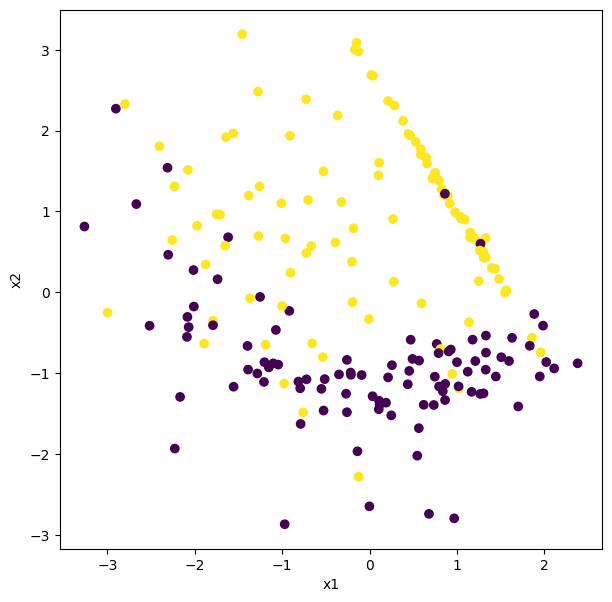

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(X['x1'], X['x2'], c = y)
plt.xlabel('x1')
plt.ylabel('x2')
xlim = plt.xlim()
ylim = plt.ylim()

#Generamos un grafico con los datos de x e y con sus diferentes filas y clasificaciones.
#Lo que se puede ver es un grafico con puntos de diferentes colores, son dos features y dos clases, no hay datos irrelevantes.

El objetivo ahora es poder clasificar las observaciones, es decir determinar el color del punto, en función de sus parámetros.

In [20]:
# Importamos la clase
from sklearn.linear_model import LogisticRegression
#La regresion logistica se usaba en variables categoricas y en este caso tenemos clases divididas en 0 y 1.

In [21]:
# Instanciamos el clasificador
lr = LogisticRegression(penalty=None, solver='saga')

#Los parametros dentro del parentesis son estipulados para la instancia de modelado
#Se usa cuando la variable objetivo es categórica, generalmente binaria (ej. sí/no, 1/0, spam/no spam).
#En lugar de predecir directamente un valor numérico, estima la probabilidad de que una instancia pertenezca a una clase.

In [23]:
# Entrenamos el modelo
lr.fit(X,y)

LogisticRegression(penalty=None, solver='saga')

Veamos qué encontró.

In [25]:
lr.coef_

array([[0.33263465, 1.9534321 ]])

In [26]:
lr.intercept_

array([0.26313804])

In [28]:
ejex = np.linspace(X['x1'].min(), X['x1'].max(), num=2)
ejey = -(lr.coef_[0][0]*ejex + lr.intercept_)/lr.coef_[0][1]

#Esta lineas de codigo lo que hacen es calcular las coordinadas de la linea que representa
#El limite de decisión del modelo entrenado de regresion logistica. El la clasificación binaria
#de un problema con dos features, el limite de de la barrera de decisión es una linea que
#separa las dos clases.
#En ejex se encuentra un array que contiene los valores minimos y maximos de x1, estos dos puntos
#Van a definir las coordinadas de x en la linea que vamos a plotear.
#Con ejey se define la linea a través del rango de x1.
#El calculo de la barrera de decisión deriva del modelo de la ecuación de la regresion logistica
#La barrera de decisión marca el limite donde la probabilidad de pertenecer a una u otra clase es
#La misma.


Grafiquemos el umbral de decisión.

(-3.171503680070779, 3.4958314570705675)

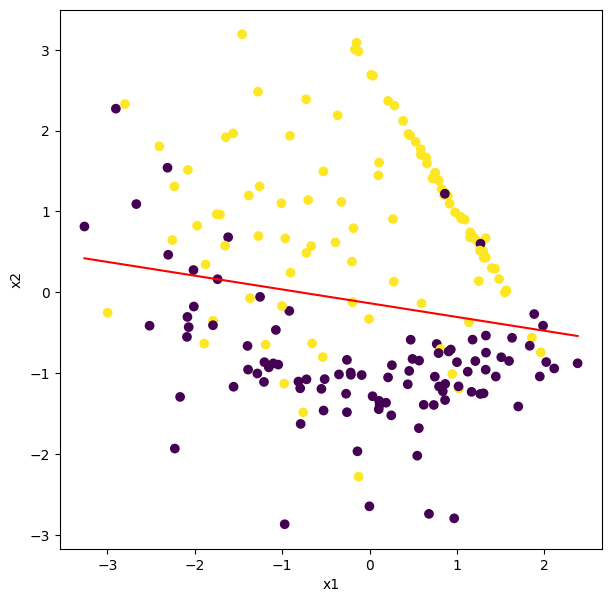

In [29]:
plt.figure(figsize=(7,7))
plt.scatter(X['x1'], X['x2'], c = y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(ejex, ejey, 'r')
plt.xlim(xlim)
plt.ylim(ylim)

In [30]:
y_pred = lr.predict(X) #Obtiene los valores de las clases predictas

In [31]:
y.values

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0])

In [32]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1])

Complejizemos el modelo agregando nuevas features. En este caso agregaremos $x_2^2$

In [33]:
X['x2_cuadrado'] = X['x2']**2
X.head() #Se agregan una nueva feature, por lo tanto don 3 features y dos clases.

,x1,x2,x2_cuadrado
0,-1.189053,-0.648235,0.420209
1,-1.368230,-0.072432,0.005246
2,-1.876199,0.345642,0.119468
3,0.018895,2.690086,7.236562
4,-1.383127,1.197926,1.435027


Volvemos a entrenar el modelo

In [38]:
lr.fit(X,y)

LogisticRegression(penalty=None, solver='saga')

In [40]:
lr.coef_
#Como tengo 3 features, tengo tres coeficientes para la frontera de decisión

array([[ 0.33547826,  1.99204585, -0.25185221]])

Veamos cómo cambió el umbral de decisión.

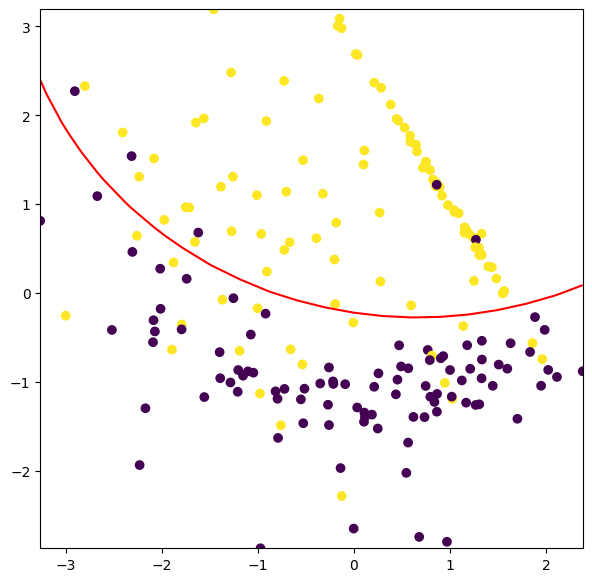

In [42]:
plt.figure(figsize=(7,7))
x1 = np.linspace(X['x1'].min(), X['x1'].max(), 20)
x2 = np.linspace(X['x2'].min(), X['x2'].max(), 20)
x1, x2 = np.meshgrid(x1,x2)
F = lr.coef_[0][0]*x1 + lr.coef_[0][1]*x2 + lr.coef_[0][2]*x1**2 + lr.coef_[0][2]*x2**2+ lr.intercept_
plt.contour(x1,x2,F,[0],colors= 'r')
plt.scatter(X['x1'], X['x2'], c = y)

#Añadir el factor polinómico hace que el umbral de decisión sea no lineal.
#Como el umbral no es lineal se deben crear varios valores entre los maximos y minimos de x1 y x2
#Luego, el array de meshgrid crea una grilla con los valores combinados de x1 y x2.
#Como tenemos 3 features, los coeficientes seran 3.
#F calcula el valor de la combinación lineal de los features y los coeficientes.
#El umbral de decisión se coloca cuando la probabilidad de pertenecer a una u otra clase es cero.


Este código visualiza la frontera de decisión de un modelo de regresión logística en un problema de clasificación con dos características (x1 y x2).
Exactamente, la frontera de decisión es la superficie que separa las clases y está determinada por los coeficientes que el modelo aprende durante el entrenamiento. En una regresión logística, estos coeficientes definen una ecuación que establece la probabilidad de pertenencia a cada clase.